#### 1.Loading the data

In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### 2.Importing library

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#### 3.Understanding the data

In [3]:
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

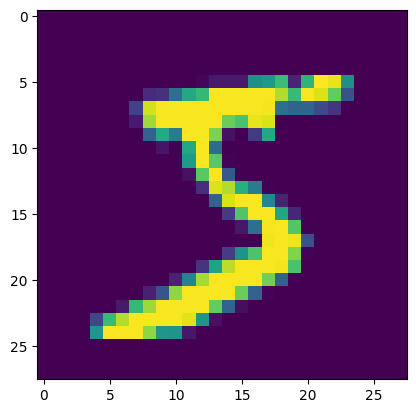

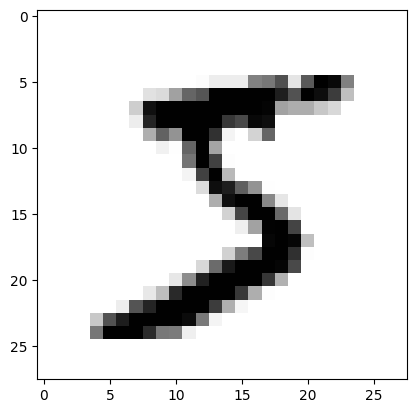

In [4]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap='binary')

## 4.Preprocessing
#### before normalization

5


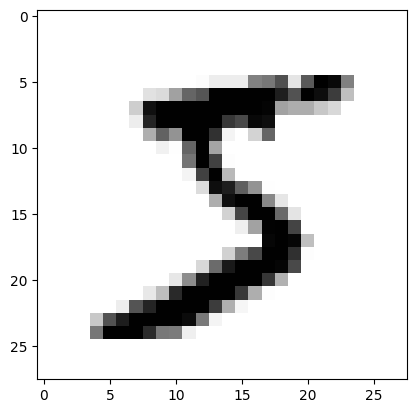

In [5]:
print(y_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)

#### 4(1).Normalizing the data

In [6]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

#### after normalizing

5


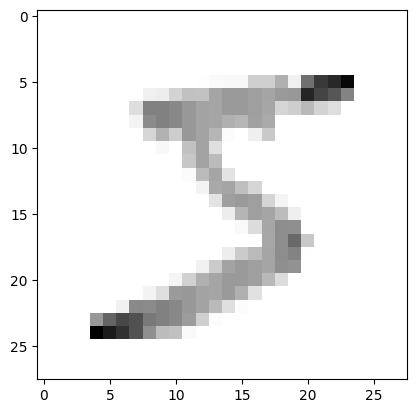

In [7]:
print(y_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)


#### 4(2).Resizing image(x_train,x_test)

In [8]:
x_trainc=np.array(x_train).reshape(-1,28,28,1)
x_testc=np.array(x_test).reshape(-1,28,28,1)

In [9]:
x_trainc.shape, x_testc.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### 4(3).Encoding (y_train,y_test)

In [10]:
y_trainc=tf.keras.utils.to_categorical(y_train)
y_testc=tf.keras.utils.to_categorical(y_test)

In [11]:
y_trainc,y_testc

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

## 5.Creating deep learning architechure

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation

In [13]:
model=Sequential() # create cnn

In [14]:
## 1st convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainc.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
## 2st convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
## 3st convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

d:\1-Project\HandWritten\ds_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

#### 6.Compile the model

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### 7.fit 

In [ ]:
model.fit(x_trainc, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.7733 - loss: 0.6900 - val_accuracy: 0.9621 - val_loss: 0.1245
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9676 - loss: 0.1121 - val_accuracy: 0.9713 - val_loss: 0.0954
Epoch 3/5
 406/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9740 - loss: 0.0842

#### 8.evaluating

In [ ]:
score=model.evaluate(x_testc,y_test)
print(f"the model acc : {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9772 - loss: 0.0780
the model acc : 0.9814000129699707


In [ ]:
pred=model.predict(x_testc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


In [ ]:
print(pred)

[[3.74730078e-08 6.76406330e-07 1.11753689e-05 ... 9.99962449e-01
  1.41837472e-06 2.61606033e-06]
 [2.25299982e-06 4.71973071e-05 9.99939203e-01 ... 8.17906766e-07
  5.74656951e-06 4.87552860e-08]
 [9.88796273e-07 9.99983668e-01 7.55973304e-07 ... 6.57699502e-06
  5.18394870e-07 3.64560583e-06]
 ...
 [5.18160306e-08 7.97128337e-08 1.07596456e-07 ... 1.87364469e-06
  8.67918334e-06 6.45531054e-06]
 [1.36568372e-06 2.41566767e-09 3.66136817e-07 ... 5.05700406e-08
  1.91043473e-05 4.67128120e-06]
 [2.83050700e-04 8.70751592e-06 2.05482902e-05 ... 5.24099981e-08
  2.32170205e-04 2.19876292e-05]]


In [ ]:
np.argmax(pred[0])

7

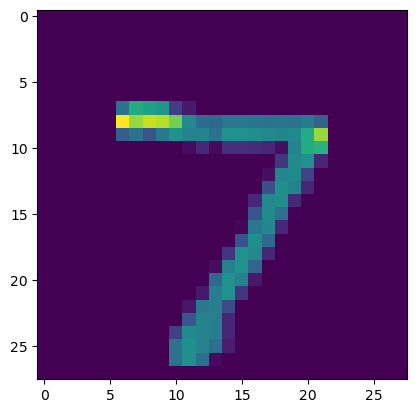

In [ ]:
plt.imshow(x_testc[0])

#### 9.save the model

In [ ]:
model.save("hwdr.h5")

# knn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
x_traink = x_train.reshape(x_train.shape[0], 28*28)
x_testk = x_test.reshape(x_test.shape[0], 28*28)

In [ ]:
# Define KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x_traink, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_testk)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.96
Confusion Matrix:
 [[ 973    1    0    0    0    1    4    0    0    1]
 [   0 1130    3    0    0    0    2    0    0    0]
 [  15    4  974    5    1    0    2   16   15    0]
 [   2    4    3  967    1    6    0    9   14    4]
 [   1    0    1    0  941    0    8    3    1   27]
 [   4    3    0   29    0  826   11    1   13    5]
 [   7    4    0    0    1    0  945    0    1    0]
 [   3   16   10    1    5    0    0  978    1   14]
 [   9    4    1    8    8    8    3    9  917    7]
 [   5    5    3    9    4    2    2    9    5  965]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.94      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.93      0.95       892
           6       0.97      0.9

# svm

In [ ]:
from sklearn import svm

In [ ]:
svm=svm.SVC(kernel='linear',degree=3,gamma='scale')
svm.fit(x_traink,y_train)

SVC(kernel='linear')

In [ ]:
y_pred1=svm.predict(x_testk)

In [ ]:
svm.score(x_testk,y_test)

In [ ]:
# svm_rbf=svm.SVC(kernel='rbf',degree=3,gamma='scale')
# svm_rbf.fit(x_traink,y_train)

In [ ]:
# y_pred2=svm_rbf.predict(x_testk)

In [ ]:
# svm_rbf.score(x_testk,y_test)

In [ ]:
from sklearn.metrics import classification_report
prediction_svm=svm.predict(x_testk)
print(classification_report(y_test,prediction_svm))

### prediction

In [ ]:
import cv2

In [ ]:
img1 = cv2.imread('digit3.png')[:,:,0]
img1=np.invert(np.array([img1]))
output=model.predict(img1)
plt.imshow(img1[0])
print(np.argmax(output))